<a href="https://colab.research.google.com/github/diablo34/notes/blob/master/fastai_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = Path('/content/drive/My Drive/Colab Notebooks/data/plastic surgery')

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/data/plastic surgery/NaturalFace'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/data/plastic surgery/PlasticFace'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/data/plastic surgery/models')]

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="train",valid='valid', valid_pct=0.2,
     ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['NaturalFace', 'PlasticFace']

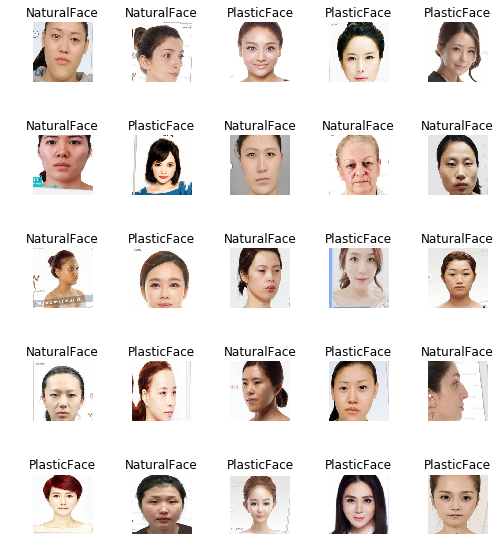

In [0]:
data.show_batch(row=3,figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['NaturalFace', 'PlasticFace'], 2, 87, 21)

In [0]:
create_cnn??

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit_one_cycle??

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.839586,0.774429,0.523810,00:02
1,0.796911,0.659469,0.333333,00:01
2,0.730642,0.652111,0.380952,00:01
3,0.688924,0.654147,0.380952,00:01


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze() #As per usual, we unfreeze the rest of our model. 

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


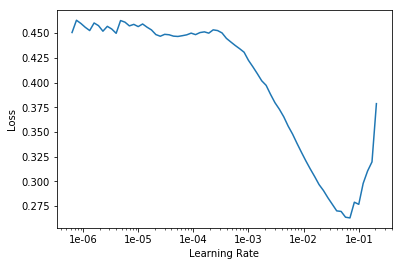

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-03,1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.797499,0.475988,0.333333,00:02
1,0.603856,2.558622,0.571429,00:02


In [0]:
learn.save('PlasticFace-test0812.export')

In [38]:
learn.load('PlasticFace-test0811')

Learner(data=ImageDataBunch;

Train: LabelList (87 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NaturalFace,NaturalFace,NaturalFace,NaturalFace,NaturalFace
Path: /content/drive/My Drive/Colab Notebooks/data/plastic surgery;

Valid: LabelList (21 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PlasticFace,NaturalFace,NaturalFace,PlasticFace,PlasticFace
Path: /content/drive/My Drive/Colab Notebooks/data/plastic surgery;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

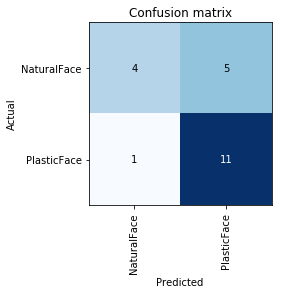

In [0]:
interp.plot_confusion_matrix()

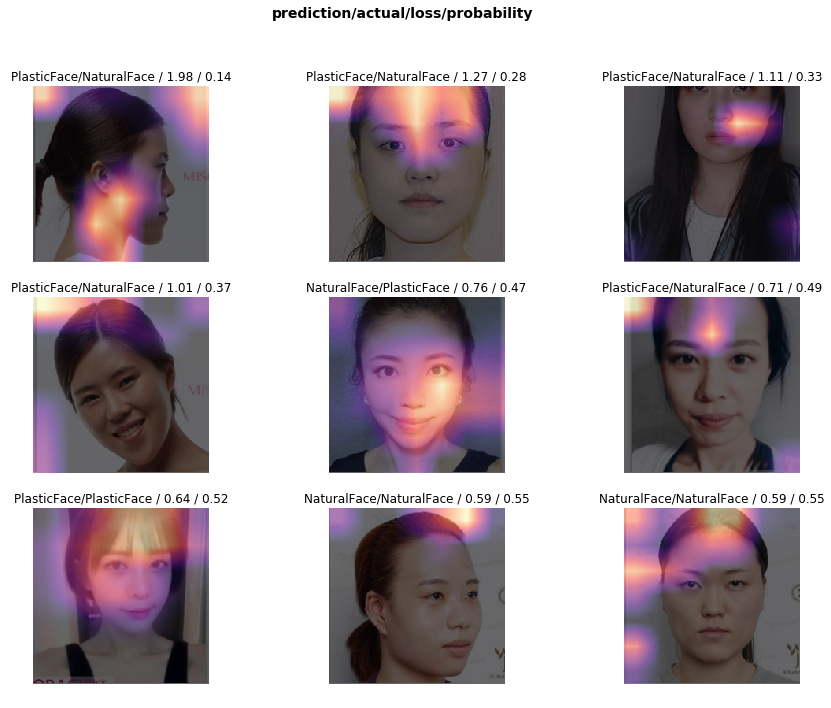

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=2)

[('NaturalFace', 'PlasticFace', 5)]

In [0]:
from fastai.widgets import * 

ds, idxs = DatasetFormatter().from_toplosses(learn)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
FileDeleter??

Object `FileDeleter` not found.


In [0]:
doc(ImageDataBunch.single_from_classes)

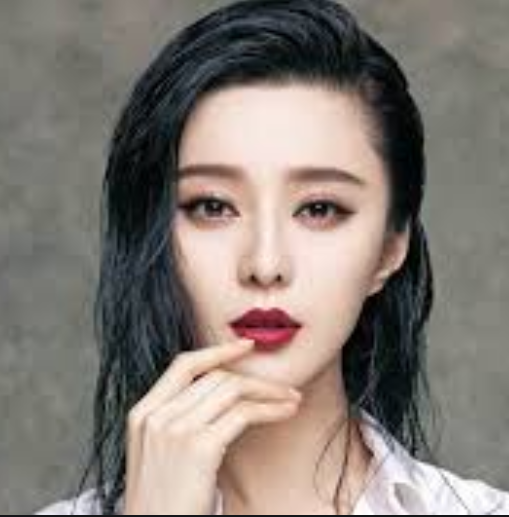

In [0]:
img = open_image('/content/Snipaste_2019-08-11_14-19-30.png')                      #test single one...need a single_from_classes data bunch
img

In [0]:
classes = ['Natural', 'PlasticFace']
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('PlasticFace-test0811')

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/Colab Notebooks/data/plastic surgery;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/Colab Notebooks/data/plastic surgery;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category PlasticFace

In [0]:
pred_idx

tensor(1)

In [0]:
outputs

tensor([0.2404, 0.7596])